In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

In [12]:
img_width, img_height = 150, 150
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 


In [13]:
train_data_dir = '/content/drive/MyDrive/Datasets_classification/train'
validation_data_dir = '/content/drive/MyDrive/Datasets_classification/test'


In [22]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(8)) 
model.add(Activation('sigmoid')) 
  
model.compile(loss ='binary_crossentropy', 
                     optimizer ='rmsprop', 
                   metrics =['accuracy']) 

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 149, 149, 32)      416       
_________________________________________________________________
activation_10 (Activation)   (None, 149, 149, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 73, 73, 32)        4128      
_________________________________________________________________
activation_11 (Activation)   (None, 73, 73, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 35, 35, 64)       

In [24]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2, 
                                  zoom_range=0.2, 
                                  horizontal_flip=True) 

In [25]:
test_datagen = ImageDataGenerator(rescale=1. / 255) 
  

In [26]:
nb_train_samples = 6899 
nb_validation_samples = 2054
epochs = 25
batch_size = 16

In [27]:
train_generator = train_datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='categorical') 

Found 6899 images belonging to 8 classes.


In [28]:
validation_generator = test_datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='categorical') 

Found 2054 images belonging to 8 classes.


In [29]:
c=model.fit_generator( 
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size, 
    epochs=epochs, 
    validation_data=validation_generator, 
    validation_steps=nb_validation_samples // batch_size) 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
431/431 [==============================] - 3095s 7s/step - loss: 0.3440 - accuracy: 0.3967 - val_loss: 0.1161 - val_accuracy: 0.8057
Epoch 2/25
431/431 [==============================] - 55s 128ms/step - loss: 0.1633 - accuracy: 0.7450 - val_loss: 0.0850 - val_accuracy: 0.8667
Epoch 3/25
431/431 [==============================] - 55s 127ms/step - loss: 0.1273 - accuracy: 0.8112 - val_loss: 0.0830 - val_accuracy: 0.8779
Epoch 4/25
431/431 [==============================] - 56s 129ms/step - loss: 0.1125 - accuracy: 0.8333 - val_loss: 0.0589 - val_accuracy: 0.9097
Epoch 5/25
431/431 [==============================] - 55s 127ms/step - loss: 0.1034 - accuracy: 0.8563 - val_loss: 0.0682 - val_accuracy: 0.8960
Epoch 6/25
431/431 [==============================] - 55s 127ms/step - loss: 0.0976 - accuracy: 0.8601 - val_loss: 0.0732 - val_accuracy: 0.8887
Epoch 7/25
431/431 [==============================] - 54s 126ms/step - loss: 0.1026 - accuracy: 0.8488 - val_loss: 0.0686 - val_acc

In [30]:
train_generator.class_indices

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

In [46]:
import matplotlib.pyplot as plt 
c.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

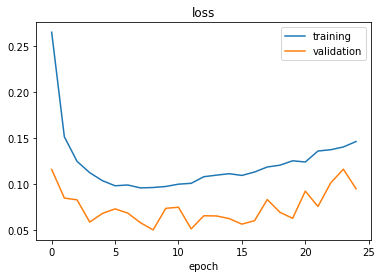

In [32]:
plt.plot(c.history['loss'])
plt.plot(c.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')

above shown is a loss function

Text(0.5, 0, 'epoch')

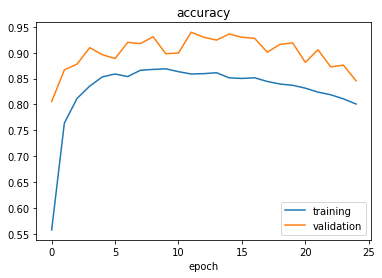

In [33]:
plt.plot(c.history['accuracy'])
plt.plot(c.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('accuracy')
plt.xlabel('epoch')

above shown is an overfitting error

In [34]:
model.save_weights('model_saved.h5') 

In [51]:
import cv2
image=cv2.imread('/content/depositphotos_8807359-stock-photo-mixed-race-man-smiling.jpg')
img=cv2.resize(image,(150,150))

In [56]:
import numpy as np
img=np.reshape(img,[1,150,150,3])

In [57]:
s=model.predict_classes(img)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [58]:
s

array([0])

In [53]:
image

array([[[186, 202, 219],
        [182, 200, 217],
        [181, 199, 216],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[178, 195, 214],
        [177, 194, 213],
        [174, 194, 212],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[169, 188, 209],
        [168, 187, 208],
        [165, 186, 207],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[174, 188, 211],
        [174, 188, 211],
        [173, 187, 210],
        ...,
        [ 63, 140, 167],
        [ 62, 139, 166],
        [ 62, 139, 166]],

       [[174, 188, 211],
        [174, 188, 211],
        [174, 188, 211],
        ...,
        [ 61, 140, 167],
        [ 60, 139, 166],
        [ 59, 138, 165]],

       [[174, 188, 211],
        [174, 188, 211],
        [174, 188, 211],
        ...,
        [ 58, 139, 166],
        [ 60, 139, 166],
        [ 59, 138, 165]]

In [55]:
img

array([[[176, 195, 213],
        [172, 195, 213],
        [165, 192, 213],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[155, 178, 204],
        [153, 179, 204],
        [150, 181, 206],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[135, 165, 191],
        [137, 166, 193],
        [141, 173, 198],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[173, 186, 210],
        [169, 183, 206],
        [169, 181, 205],
        ...,
        [ 61, 141, 168],
        [ 68, 141, 169],
        [ 72, 140, 169]],

       [[172, 186, 209],
        [169, 183, 206],
        [169, 183, 206],
        ...,
        [ 66, 143, 170],
        [ 67, 141, 169],
        [ 66, 140, 168]],

       [[174, 188, 211],
        [174, 188, 211],
        [173, 187, 210],
        ...,
        [ 62, 146, 174],
        [ 58, 143, 169],
        [ 60, 139, 166]]